<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/Akimkin_Timofey_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_4_%D0%90%D0%B2%D0%B8%D0%B0%D1%80%D0%B5%D0%B9%D1%81%D1%8B_%D0%B1%D0%B5%D0%B7_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка библиотек

In [70]:
import pandas as pd
from datetime import datetime as dat
#import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #(action='once')
# import missingno as msno
# from itertools import combinations
# from scipy.stats import ttest_ind
# from scipy.stats import norm
 
%matplotlib inline
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.options.display.precision = 2
# pd.options.display.float_format = '{:.2f}'.format

#Загрузка датасета

In [75]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/Project_4%20-%20Loseless%20flights.csv'
data = pd.read_csv(path)
        
data.sample(15)

,flight_id,departure_city,arrival_city,scheduled_departure,flight_duration_in_hr,flight_distance,avg_speed,aircraft_model,seats_in_a_plane,seats_sold,gain_per_flight,income_per_flight_eval1,income_per_flight_eval2
74,136620,Анапа,Белгород,2017-02-17T09:25:00Z,0.82,636,778.78,Sukhoi Superjet-100,97,79,6.14e+05,5.76e+05,5.52e+05
95,136758,Анапа,Белгород,2017-01-12T09:25:00Z,0.82,636,778.78,Sukhoi Superjet-100,97,97,7.65e+05,7.17e+05,7.01e+05
101,136802,Анапа,Белгород,2017-02-26T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,96,7.46e+05,7.01e+05,6.84e+05
111,136857,Анапа,Белгород,2017-02-13T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,97,7.65e+05,7.19e+05,7.03e+05
18,136215,Анапа,Москва,2017-02-28T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,114,1.66e+06,1.52e+06,1.51e+06
0,136119,Анапа,Москва,2017-01-03T10:05:00Z,1.68,1208,717.62,Boeing 737-300,130,113,1.65e+06,1.51e+06,1.49e+06
124,136951,Анапа,Белгород,2017-02-02T09:25:00Z,0.82,636,778.78,Sukhoi Superjet-100,97,90,7.21e+05,6.78e+05,6.59e+05
103,136815,Анапа,Белгород,2017-02-19T09:25:00Z,0.85,636,748.24,Sukhoi Superjet-100,97,97,7.65e+05,7.19e+05,7.01e+05
125,136953,Анапа,Белгород,2017-02-27T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,97,7.65e+05,7.19e+05,7.03e+05
116,136887,Анапа,Белгород,2017-01-20T09:25:00Z,0.82,636,778.78,Sukhoi Superjet-100,97,78,5.95e+05,5.56e+05,5.31e+05


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                127 non-null    int64  
 1   departure_city           127 non-null    object 
 2   arrival_city             127 non-null    object 
 3   scheduled_departure      127 non-null    object 
 4   flight_duration_in_hr    127 non-null    float64
 5   flight_distance          127 non-null    int64  
 6   avg_speed                127 non-null    float64
 7   aircraft_model           127 non-null    object 
 8   seats_in_a_plane         127 non-null    int64  
 9   seats_sold               127 non-null    int64  
 10  gain_per_flight          118 non-null    float64
 11  income_per_flight_eval1  118 non-null    float64
 12  income_per_flight_eval2  118 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 13.0+ KB


In [76]:
data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']] =\
    data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']].\
        apply(lambda se: se.apply(lambda x: '%.0f' % x), axis=1)

data.drop(['flight_id', 'avg_speed'], axis=1, inplace=True)

# data.fillna(0)


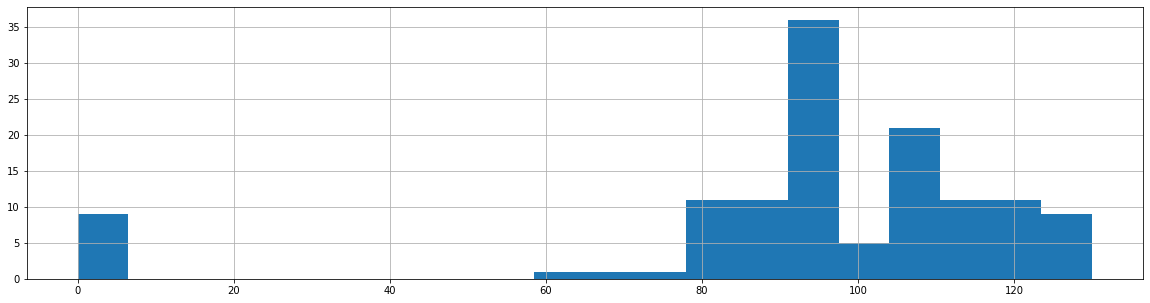

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

In [65]:
plt.figure(figsize = (20, 5))
data.seats_sold.hist(bins=20);

plt.show()
plt.figure(figsize = (20, 5))
# data.avg_speed.hist(bins=10);


###Рейсы в Новокузнецк не имеют статус отменненых, однако **данных** по количеству купленных билетов и соответственно по прибыли нет

In [74]:
print('Количество непустых строк по городу прибытия Новокузнецк: ', data[(data.seats_sold != 0) & (data.arrival_city == 'Новокузнецк')].shape[0])

# data[data.gain_per_flight == 'nan']['gain_per_flight'] = ''
# data[data.income_per_flight_eval1 == 'nan']['income_per_flight_eval1'] = ''
# data[data.income_per_flight_eval2 == 'nan']['income_per_flight_eval2'] = ''

data[data.arrival_city == 'Новокузнецк']

Количество непустых строк по городу прибытия Новокузнецк:  0


,departure_city,arrival_city,scheduled_departure,flight_duration_in_hr,flight_distance,aircraft_model,seats_in_a_plane,seats_sold,gain_per_flight,income_per_flight_eval1,income_per_flight_eval2
59,Анапа,Новокузнецк,2017-02-21T06:10:00Z,5.17,3661,Boeing 737-300,130,0,nan,nan,nan
60,Анапа,Новокузнецк,2017-02-28T06:10:00Z,5.17,3661,Boeing 737-300,130,0,nan,nan,nan
61,Анапа,Новокузнецк,2017-02-07T06:10:00Z,4.98,3661,Boeing 737-300,130,0,nan,nan,nan
62,Анапа,Новокузнецк,2017-01-10T06:10:00Z,5.20,3661,Boeing 737-300,130,0,nan,nan,nan
63,Анапа,Новокузнецк,2017-01-17T06:10:00Z,5.12,3661,Boeing 737-300,130,0,nan,nan,nan
64,Анапа,Новокузнецк,2017-01-31T06:10:00Z,5.07,3661,Boeing 737-300,130,0,nan,nan,nan
65,Анапа,Новокузнецк,2017-01-03T06:10:00Z,5.03,3661,Boeing 737-300,130,0,nan,nan,nan
66,Анапа,Новокузнецк,2017-01-24T06:10:00Z,5.08,3661,Boeing 737-300,130,0,nan,nan,nan
67,Анапа,Новокузнецк,2017-02-14T06:10:00Z,5.18,3661,Boeing 737-300,130,0,nan,nan,nan


In [68]:
data.columns
df1 = pd.DataFrame(data.groupby(by=['arrival_city', 'aircraft_model'])['departure_city'].count())
df1.columns = ['num_of_flights']

df2 = data.groupby(by=['arrival_city', 'aircraft_model']).mean()
df2 

,,flight_duration_in_hr,flight_distance,seats_in_a_plane,seats_sold
arrival_city,aircraft_model,,,,
Белгород,Sukhoi Superjet-100,0.83,636.0,97.0,90.19
Москва,Boeing 737-300,1.66,1208.0,130.0,113.12
Новокузнецк,Boeing 737-300,5.11,3661.0,130.0,0.00
